In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import textblob as tb

In [2]:
df = pd.read_csv("Clothing_Shoes_and_Jewelry_5.tsv", sep= "\t")
df.head()

,id,rating,keyword,text
0,0,5.0,great,This is a great tutu and at a really great pri...
1,1,5.0,yr,I bought this for my 4 yr old daughter for dan...
2,2,5.0,great,What can I say... my daughters have it in oran...
3,3,5.0,tutus,"We bought several tutus at once, and they are ..."
4,4,5.0,great,Thank you Halo Heaven great product for Little...


In [6]:
df['polarity'] = df['text'].map(lambda text: tb.TextBlob(str(text)).sentiment.polarity)
df['text'] = df['text'].astype("U")

In [7]:
from wordcloud import WordCloud, STOPWORDS

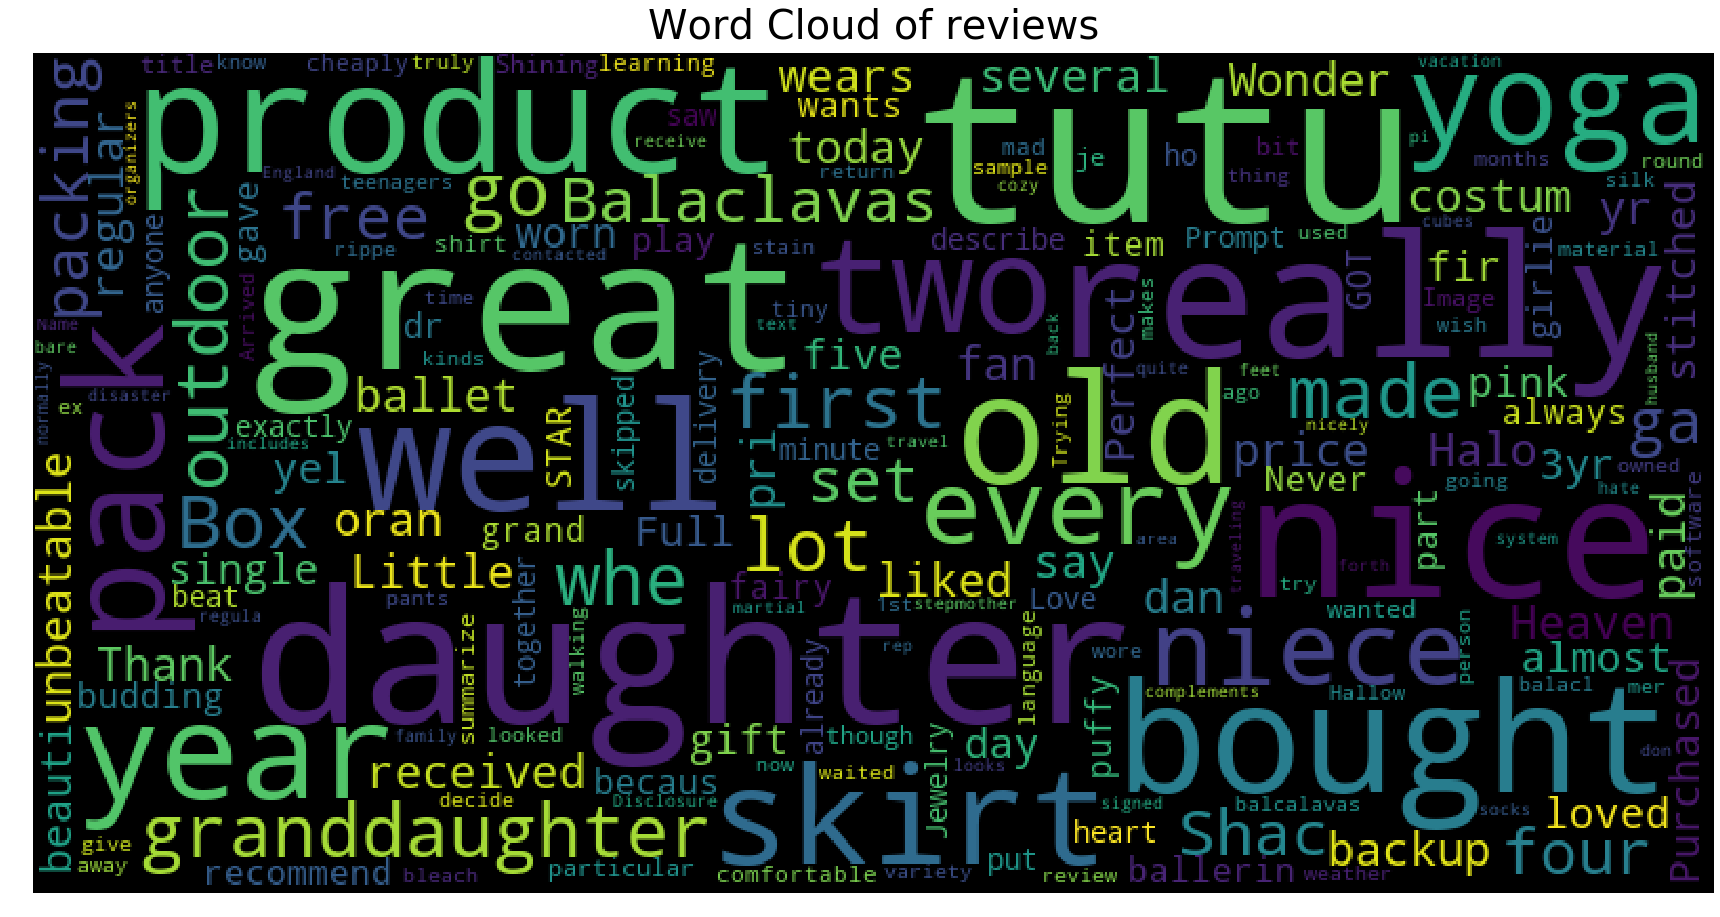

In [15]:
def plot_wordcloud(text,image_name, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
        plt.savefig(image_name+".png", transparent=True)
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
    plt.savefig(image_name+".png", transparent=True)
    
plot_wordcloud(df["text"],"reviews",title="Word Cloud of reviews")


In [12]:
rating5_df=df.loc[df['rating']==5]
rating1_df=df.loc[df['rating']==1]
rating0_df=df.loc[df['rating']==0]

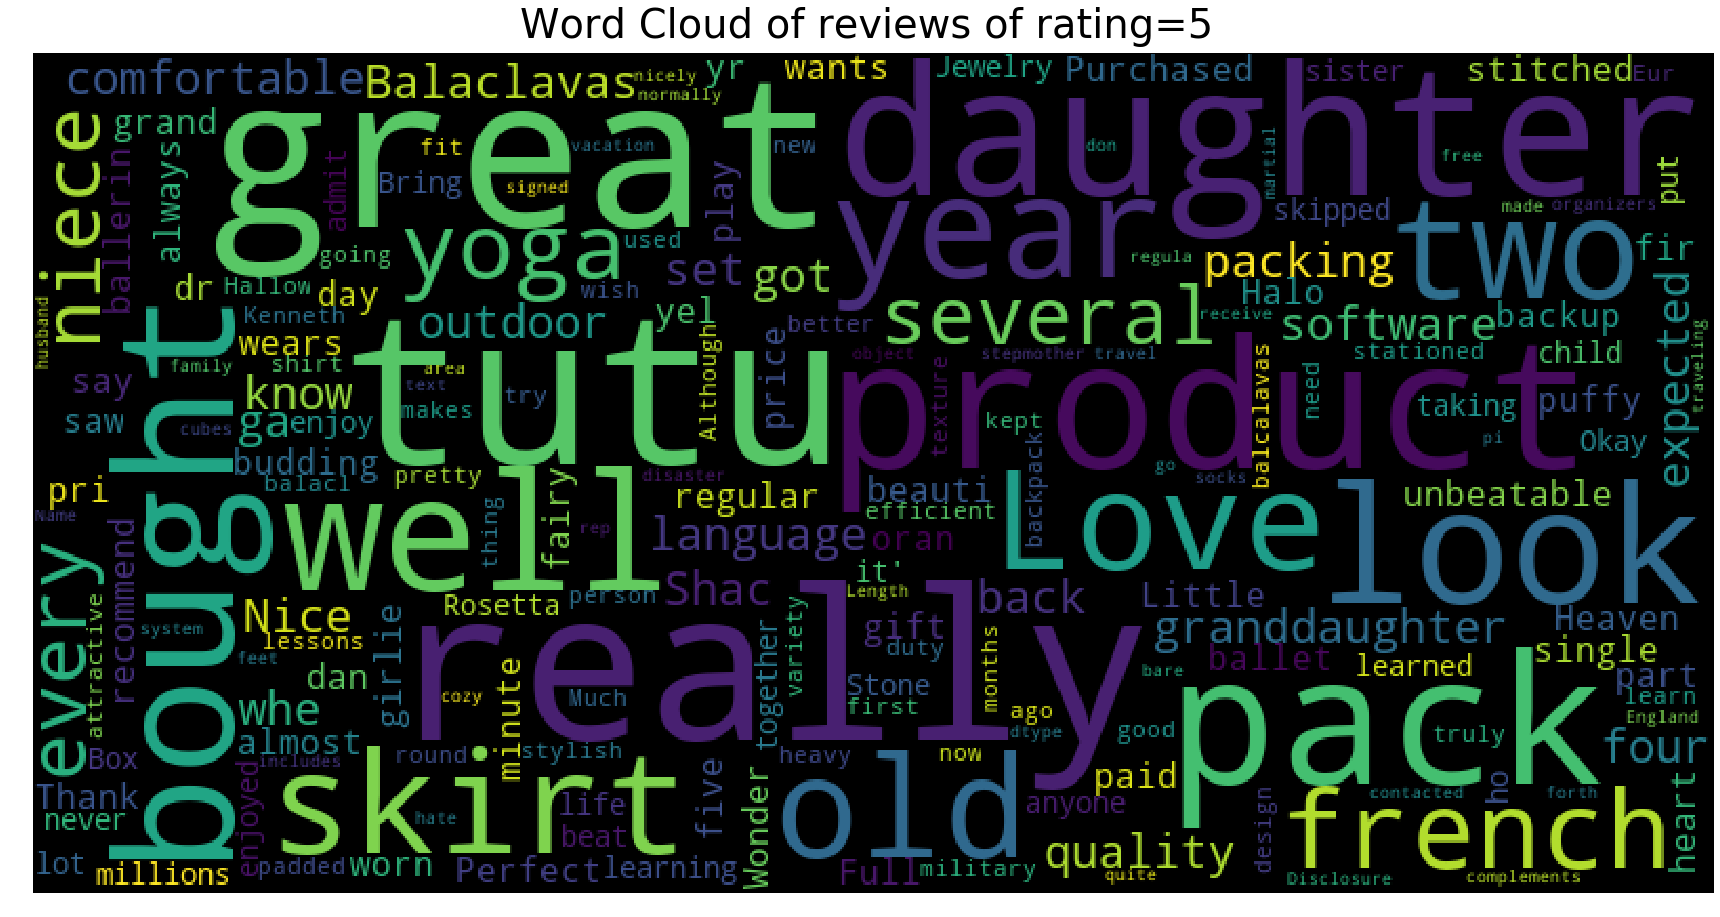

In [16]:

plot_wordcloud(rating5_df["text"],"reviews of rating 5",title="Word Cloud of reviews of rating=5 ")


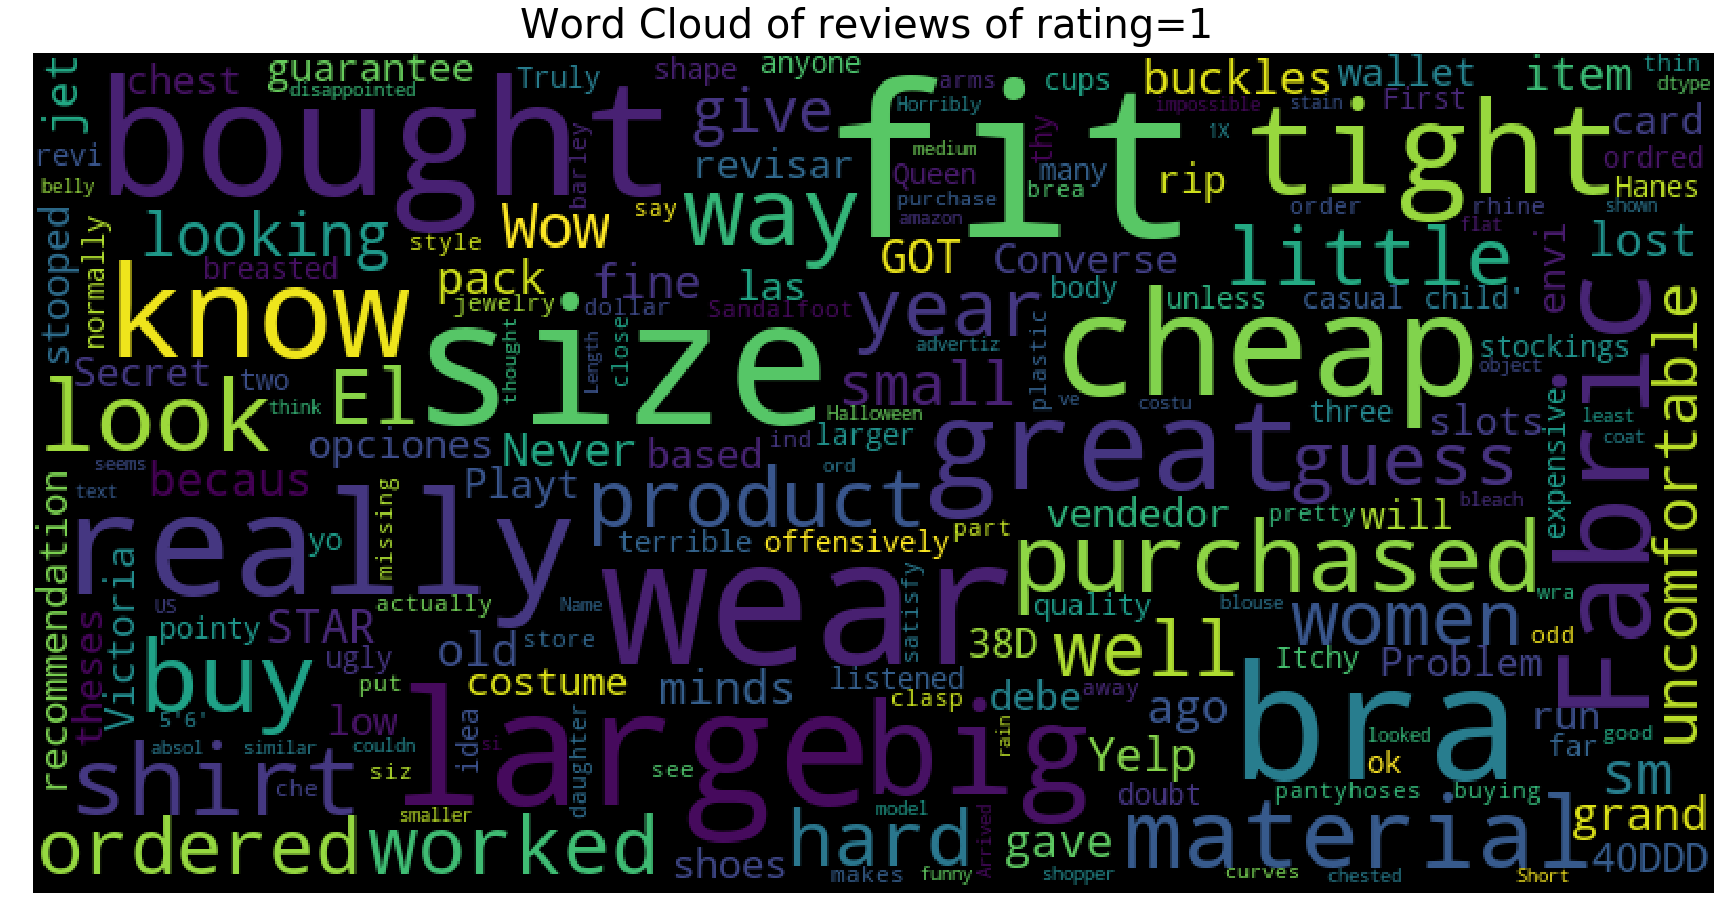

In [17]:


plot_wordcloud(rating1_df["text"],"review of rating 1",title="Word Cloud of reviews of rating=1 ")